# Astroplan Plotting Examples - Sky Plot

To generate sky plots with `Astroplan`, use the `plot_sky` function.  

This function takes, at minimum, a `Target`, an `Observer` and a `Time` object as input.  
Optional arguments include an `Axes` object and a style dictionary.  

`plot_sky` will return an `Axes` object with target positions plotted at the time(s) specified.  You can further manipulate the returned `Axes` object, or simply print the plot to your display or save it as a file. 

## Contents

[General guidelines](#General-guidelines.)

[Making a sky plot for one instance in time.](#Making-a-sky-plot-for-one-instance-in-time.)

[Showing the movement of celestial bodies.](#Showing-the-movement-of-celestial-bodies-over-time.)

[Warning--Objects below the horizon.](#Warning---Objects-below-horizon.)

[Customizing your plot.](#Customizing-your-plot)

   - [Style options.](#Changing-style-options.)
    
   - [Coordinates.](#Changing-coordinate-defaults.)

   - [Other tweaks.](#Other-tweaks.)

[Explicitly passing in an `Axes` object.](#Explicitly-passing-in-an-Axes-object)

   - [Multiple plots.](#Making-multiple-plots.)

## General guidelines.

Most users will want to see the positions of several `Target`s with respect to an `Observer`'s zenith, as well as the positions of familiar stars or other objects to act as guides.  

`plot_sky` allows you to pass in only one `Target` at a time (like `plot_airmass` and `plot_parallactic`), so if you want to map the positions of multiple objects on the same plot, you have two options:

* Allow `plot_sky` to reuse the returned `Axes` object to map multiple objects on the same plot (simply reissue the command with a new `Target` argument).
* Explicitly use a previously constructed polar `Axes` object as an input.

However, you do have the option of passing in a `Time` object that contains as many instances in time as you like.  This means that you can:

* See the position of celestial bodies at a single instance in time OR 
* Map them over the course of a night.

Note that whatever you do, you must use the same `Observer` when reusing an `Axes` object.  

`plot_sky` currently produces polar plots in altitude/azimuth coordinates only, but does allow for multiple plotting styles and certain coordinate changes for customization.

## Making a sky plot for one instance in time.

To show the position(s) of your target(s) at one instance in time, you must use a non-scalar time input containing a single instance in time (e.g., use `Time(['2010-1-1'])` or `[Time('2010-1-1')]` instead of `Time('2010-1-1')`).

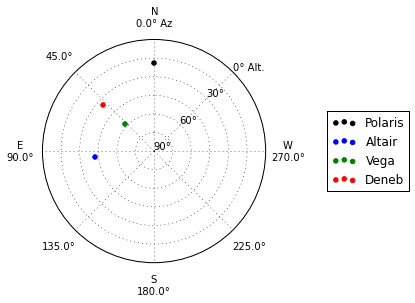

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.units as u
from astropy.coordinates import EarthLocation, SkyCoord
from pytz import timezone
from astropy.time import Time

from astroplan import Observer
from astroplan import FixedTarget
from astroplan.plots import plot_sky

# Set up Observer, Target and observation time objects. 
longitude = '-155d28m48.900s'
latitude = '+19d49m42.600s'
elevation = 4163 * u.m
location = EarthLocation.from_geodetic(longitude, latitude, elevation)

observer = Observer(name='Subaru Telescope',
               location=location,
               pressure=0.615 * u.bar,
               relative_humidity=0.11,
               temperature=0 * u.deg_C,
               timezone=timezone('US/Hawaii'),
               description="Subaru Telescope on Mauna Kea, Hawaii")

coordinates = SkyCoord('02h31m49.09s', '+89d15m50.8s', frame='icrs')
polaris = FixedTarget(name='Polaris', coord=coordinates)
polaris_style = {'marker': 'o', 'color': 'k'}

coordinates = SkyCoord('19h50m47.6s', '+08d52m12.0s', frame='icrs')
altair = FixedTarget(name='Altair', coord=coordinates)
altair_style = {'marker': 'o', 'color': 'b'}

coordinates = SkyCoord('18h36m56.5s', '+38d47m06.6s', frame='icrs')
vega = FixedTarget(name='Vega', coord=coordinates)
vega_style = {'marker': 'o', 'color': 'g'}

coordinates = SkyCoord('20h41m25.9s', '+45d16m49.3s', frame='icrs')
deneb = FixedTarget(name='Deneb', coord=coordinates)
deneb_style = {'marker': 'o', 'color': 'r'}

# Note that this is not a scalar.
observe_time = Time(['2015-03-15 15:30:00'])

plot_sky(polaris, observer, observe_time, style_kwargs=polaris_style)
plot_sky(altair, observer, observe_time, style_kwargs=altair_style)
plot_sky(vega, observer, observe_time, style_kwargs=vega_style)
plot_sky(deneb, observer, observe_time, style_kwargs=deneb_style)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

## Showing the movement of celestial bodies over time.

You can make a plot that shows how your targets move over time in two different ways.

As with `plot_airmass` and `plot_parallactic`, using a scalar `Time` object as input for `plot_sky` will result in a plot with information about your object over a 24 hour window.  

In particular, `plot_sky` will show the position of your target at every hour within the time window, save for when it is below the horizon.

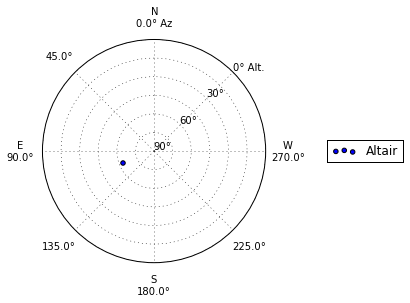

In [3]:

observe_time = Time('2015-03-15 17:00:00')

plot_sky(altair, observer, observe_time)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

If you want to control the size of the time window or want update target positions more or less often than once an hour, then explicitly include every instance in time.

You can quickly populate your `Time` object with multiple times by using Numpy.

For example, you can center the window of time at one particular instance...

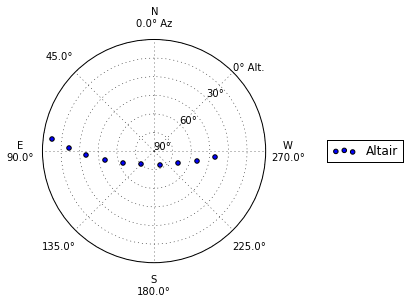

In [4]:
import numpy as np

observe_time = Time('2015-03-15 17:00:00')
observe_time = observe_time + np.linspace(-4, 5, 10)*u.hour

plot_sky(altair, observer, observe_time)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

...or, if you know the start and end times of your observation run, you can use a `DeltaTime` object.

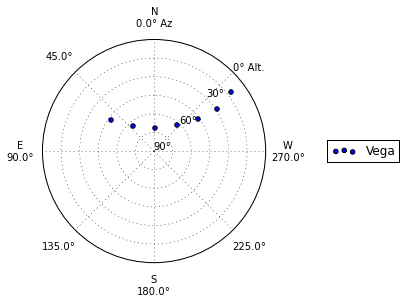

In [5]:
start_time = Time('2015-03-15 14:30:00')
end_time = Time('2015-03-15 23:30:00')
delta_t = end_time - start_time
observe_time = start_time + delta_t*np.linspace(0, 1, 7)

plot_sky(vega, observer, observe_time)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

## Warning - Objects below horizon.

**NOTE: WARNINGS HAVE BEEN SUPPRESSED IN THIS NOTEBOOK, BUT THEY WORK.**

Note that in the case of an object being under the horizon (negative altitude) for any of the times in your input `Time` object, `plot_sky` will warn you.  Your object(s) will not show up on the plot for that particular time, but `plot_sky` will still map any positions that are above the horizon.

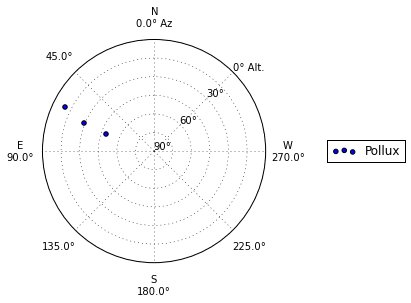

In [6]:
coordinates = SkyCoord('07h45m19.4s', '+28d01m35s', frame='icrs')
pollux = FixedTarget(name='Pollux', coord=coordinates)

start_time = Time('2015-01-15 18:00:00')
end_time = Time('2015-01-16 07:30:00')
delta_t = end_time - start_time
observe_time = start_time + delta_t*np.linspace(0, 1, 10)

plot_sky(pollux, observer, observe_time)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

## Customizing your plot

Now that you know how to make basic sky maps with `plot_sky`, you may want to tweak your plots.

### Changing style options.

The default marker is a black circle, but you can change the `marker` and `color` properties of any target by setting the `style_kwargs` option, as seen above in the various examples.  

One situation in which this is particularly useful is the plotting of guide positions, such as a few familiar stars or any body used in calibrating your telescope.  You can also use this feature to set apart different types of targets (e.g., high-priority, candidates for observing run, etc.).

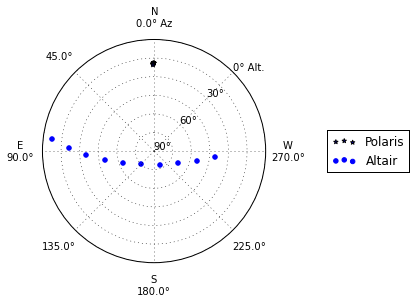

In [7]:
guide_style = {'marker': '*'}
target_style = {'color': 'b'}

observe_time = Time('2015-03-15 17:00:00')
observe_time = observe_time + np.linspace(-4, 5, 10)*u.hour

plot_sky(polaris, observer, observe_time, style_kwargs=guide_style)
plot_sky(altair, observer, observe_time, style_kwargs=target_style)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

### Changing coordinate defaults.

As seen in the above examples, the default position of `North` is at the top of of the plot, and `South` at the bottom, with azimuth increasing counter-clockwise (CCW), putting `East` to the left, and `West` to the right.

You can't change the position of `North` or `South` (either in the actual plotting of the data, or the labels), but you can "flip" `East`/`West` by changing the direction in which azimuth increases via the `north_to_east_ccw` option.

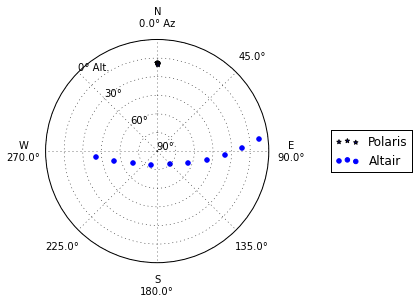

In [8]:
plot_sky(polaris, observer, observe_time, style_kwargs=guide_style)
plot_sky(altair, observer, observe_time, style_kwargs=target_style, north_to_east_ccw=False)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

Some telescopes may need to offset or rotate the azimuth labels due to their particular setup. 

To do this, set `az_label_offset` equal to the number of degrees by which you wish to rotate the labels.  By default, this is set to `0 degrees.`  A positive offset is in the same direction as azimuth increase (see the `north_to_east_ccw` option).

NOTE: This option does **not** rotate the actual positions on the plot, but simply the theta grid **labels**.  Since labels are drawn with every call to `plot_sky`, you need use the same `az_label_offset` argument for **all** calls.

WARNING: It is not advised that most users change this option, as it may appear that your alt/az data does not coincide with the definition of altazimuth (local horizon) coordinate system.  

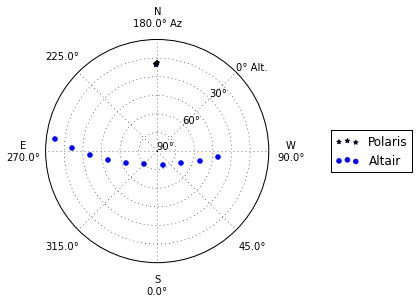

In [9]:
plot_sky(polaris, observer, observe_time, style_kwargs=guide_style, az_label_offset=180.0*u.deg)
plot_sky(altair, observer, observe_time, style_kwargs=target_style, az_label_offset=180.0*u.deg)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

You can turn off the grid lines by setting the `grid` option to `False`.

NOTE: Since grids are redrawn with every call to `plot_sky`, you must set `grid=False` for every target you include in your plot.

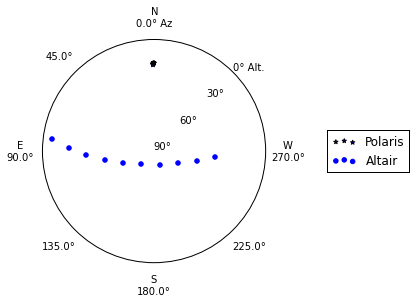

In [10]:
plot_sky(polaris, observer, observe_time, style_kwargs=guide_style, grid=False)
plot_sky(altair, observer, observe_time, style_kwargs=target_style, grid=False)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

### Other tweaks.

You can easily change other plot attributes by acting on the returned `Axes` object or via `plt.figure`, `plt.rc`, and other calls.

For instance, you can increase the size of your plot and its font.

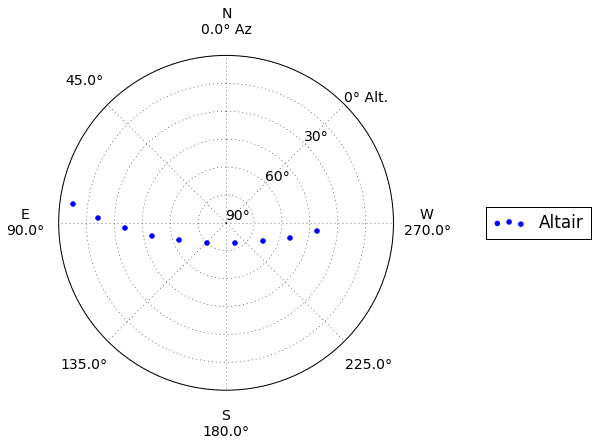

In [11]:
# Note that you need to set the size of the figure before you issue the plotting command
plt.figure(figsize=(8,6))
plt.rc('font', size=14)

plot_sky(altair, observer, observe_time, style_kwargs=target_style)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

# Change font size back to default once done plotting.
plt.rc('font', size=12)

# Explicitly passing in an `Axes` object

The easiest way to reuse an `Axes` object for plotting multiple targets is to let `plot_sky` handle this internally, but you have the flexibility of passing in a named axis, assuming that it is in the polar projection.

Here, we explicitly give a name to the `Axes` object returned by `plot_sky` when plotting Polaris, and reuse it to plot Altair.

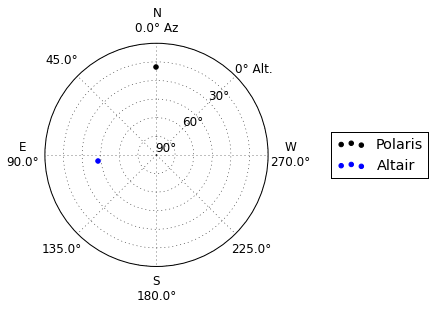

In [12]:
observe_time = Time(['2015-03-15 15:30:00'])

my_ax = plot_sky(polaris, observer, observe_time, style_kwargs=polaris_style)
plot_sky(altair, observer, observe_time, my_ax, style_kwargs=altair_style)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

Here, we first create an `Axes` object entirely outside of `plot_sky`, then pass it in.

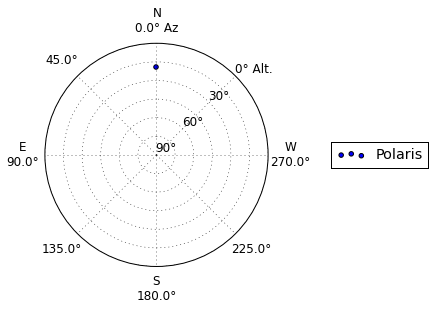

In [13]:
my_ax = plt.gca(projection='polar')
plot_sky(polaris, observer, observe_time, my_ax)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

### Making multiple plots.

Passing in named `Axes` objects comes in handy when you want to make multiple plots.

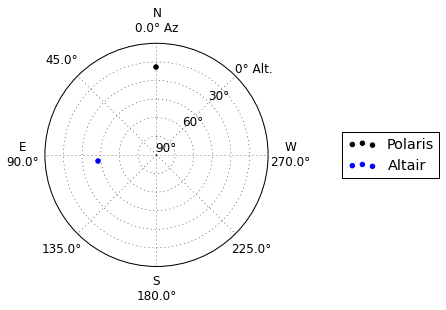

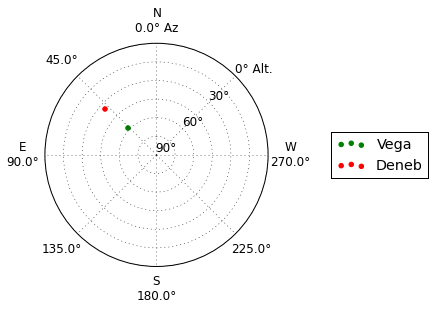

In [14]:
my_ax = plot_sky(polaris, observer, observe_time, style_kwargs=polaris_style)
plot_sky(altair, observer, observe_time, my_ax, style_kwargs=altair_style)
plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
# Note that this plt.show (or another action, such as saving a figure) is critical in maintaining two separate plots.
plt.show()

other_ax = plot_sky(vega, observer, observe_time, style_kwargs=vega_style)
plot_sky(deneb, observer, observe_time, other_ax, style_kwargs=deneb_style)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

# Testing Scalar `Time` Inputs

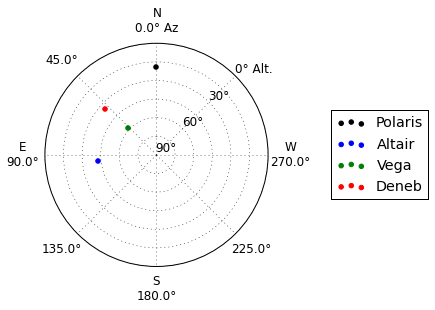

In [15]:
observe_time = Time('2015-03-15 15:30:00')

plot_sky(polaris, observer, observe_time, style_kwargs=polaris_style)
plot_sky(altair, observer, observe_time, style_kwargs=altair_style)
plot_sky(vega, observer, observe_time, style_kwargs=vega_style)
plot_sky(deneb, observer, observe_time, style_kwargs=deneb_style)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

# Testing Lists of Time Objects as Input

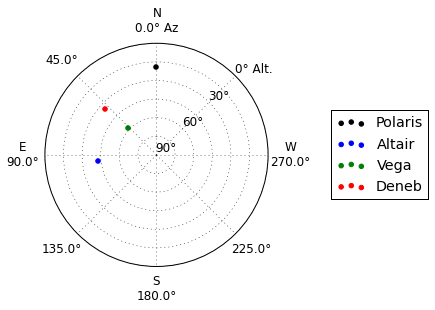

In [16]:
observe_time = [Time('2015-03-15 15:30:00')]

plot_sky(polaris, observer, observe_time, style_kwargs=polaris_style)
plot_sky(altair, observer, observe_time, style_kwargs=altair_style)
plot_sky(vega, observer, observe_time, style_kwargs=vega_style)
plot_sky(deneb, observer, observe_time, style_kwargs=deneb_style)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()